## Setup working directory

In [8]:
%cd ../src

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


## Load dataframe

In [9]:
import os
import numpy as np
import re
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#df = pd. 

print('pykeen file does not exist. Writing pykeen file...')
df = pd.DataFrame(columns=["full_name","f1_macro","f1_micro"])
        
dfs = []
i = 0
for entry in os.listdir('../data/predicted/'):
    results = np.loadtxt(f'../data/predicted/{entry}', dtype=np.int32, delimiter=',')
    i+=1
    dfs.append(pd.DataFrame(
        [[
            entry,
            f1_score(results[0],results[1],average='micro'),
            f1_score(results[0],results[1],average='macro'),
        ]],
        columns=["full_name","f1_macro","f1_micro"]
    ))


df = pd.concat(dfs,ignore_index=True)
df['base_name']= df['full_name'].str.extract(r'(.*)\$[0-9]+\.csv')
df = df.groupby('base_name').mean().round(3)
df = df.reset_index()
df['dataset']= df['base_name'].str.extract(r'(.*?)\+.*')
df['eval_method']= df['base_name'].str.extract(r'.*\$([A-Z]+)')
df['steps'] = df['base_name'].str.findall(r'\+(.*?)-')
df['steps'] = [', '.join(map(str, l)) for l in df['steps']]
df['embedder'] = df['base_name'].str.extract(r'\$(.*?)\$')
df = df.drop(columns='base_name')


pykeen file does not exist. Writing pykeen file...


C:\Users\Noctris\AppData\Local\Temp\ipykernel_37560\1908857062.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('base_name').mean().round(3)


## Inspect H1

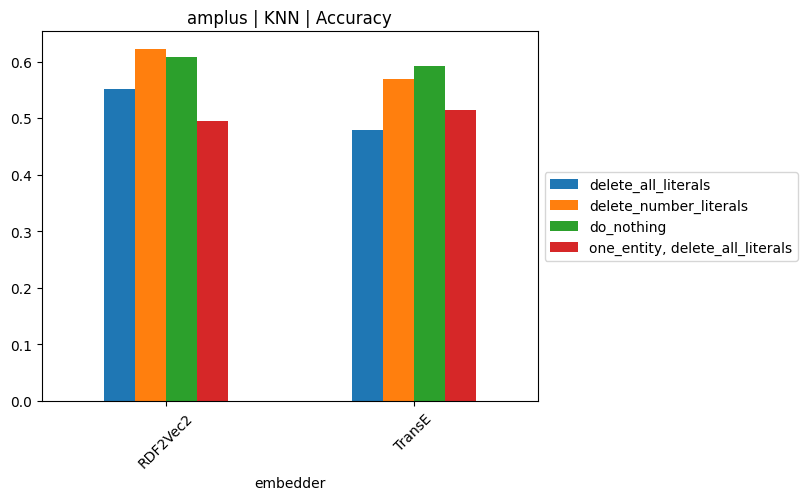

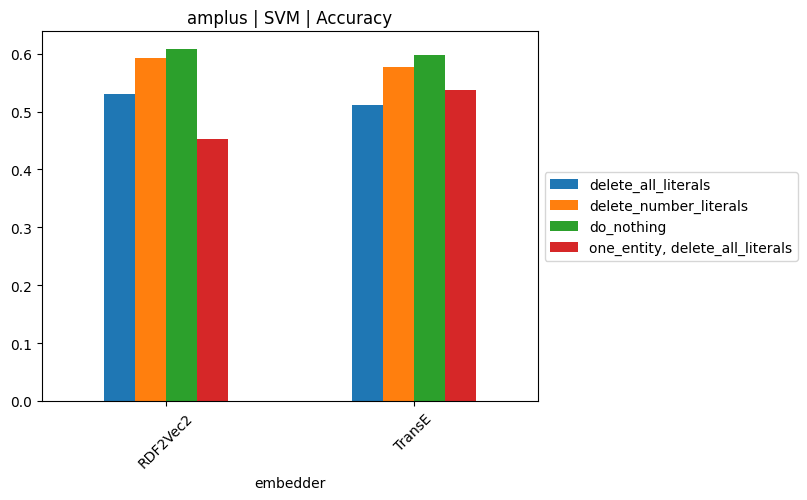

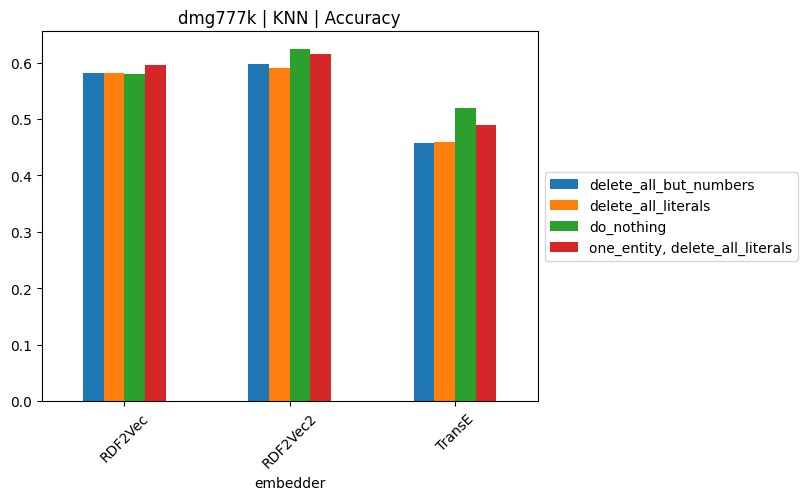

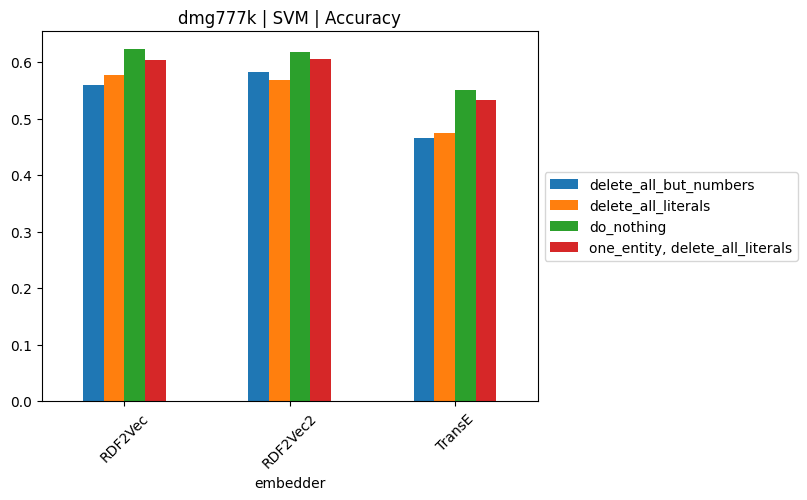

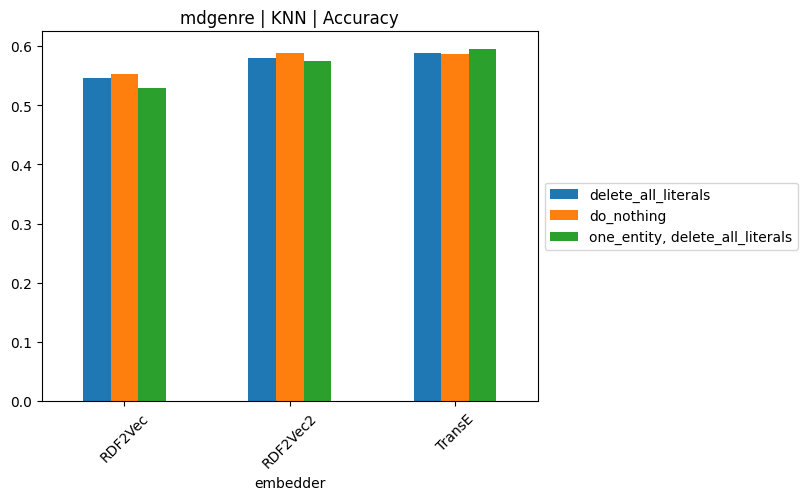

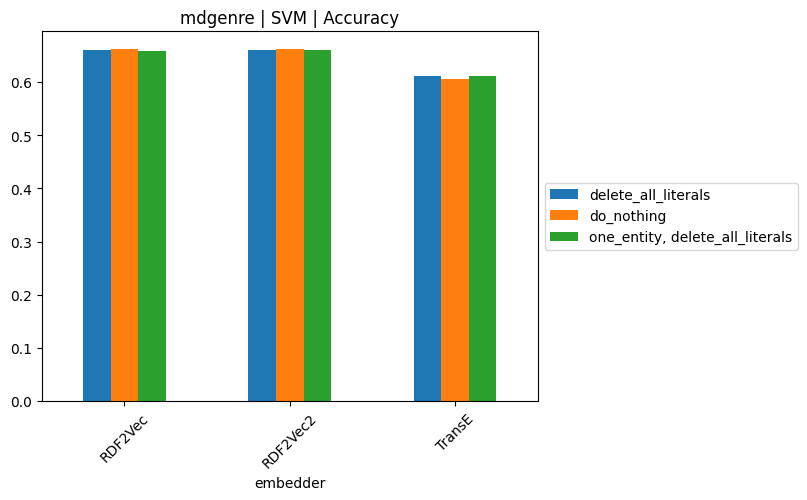

In [15]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

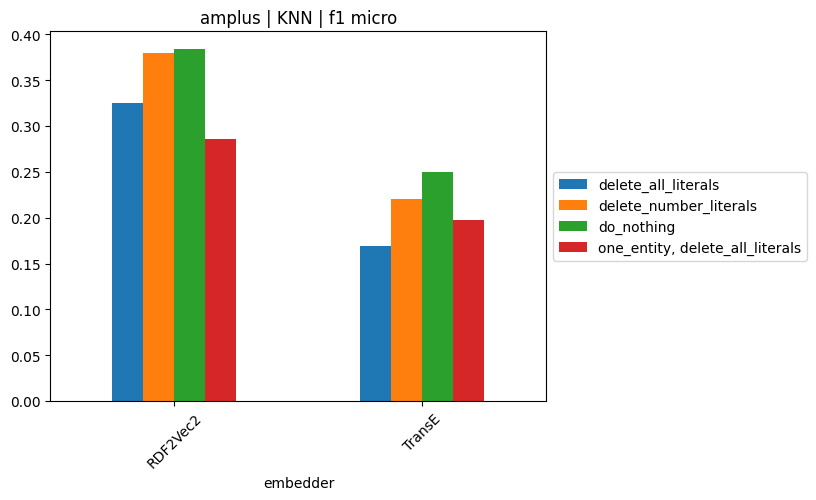

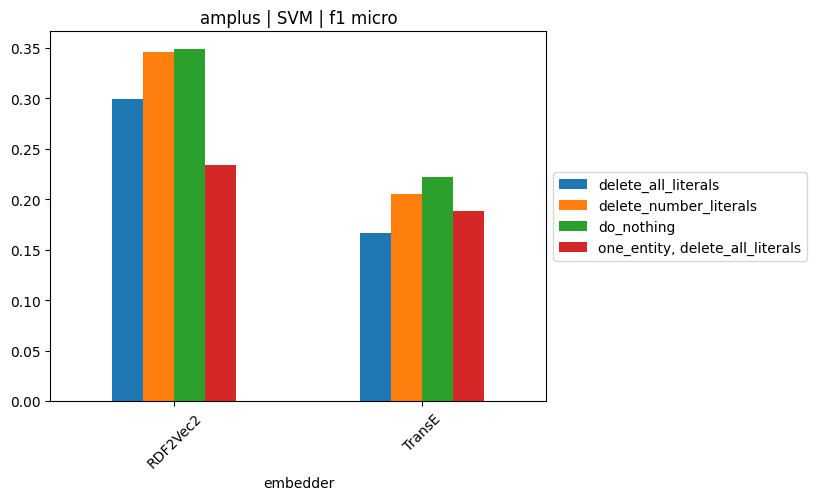

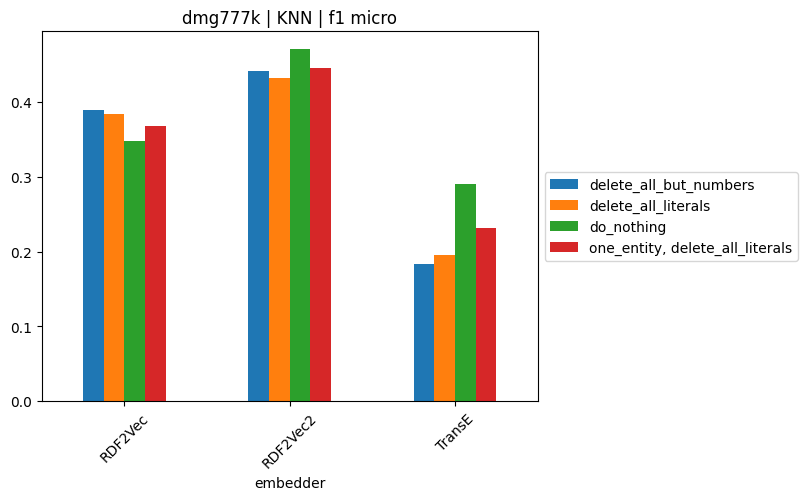

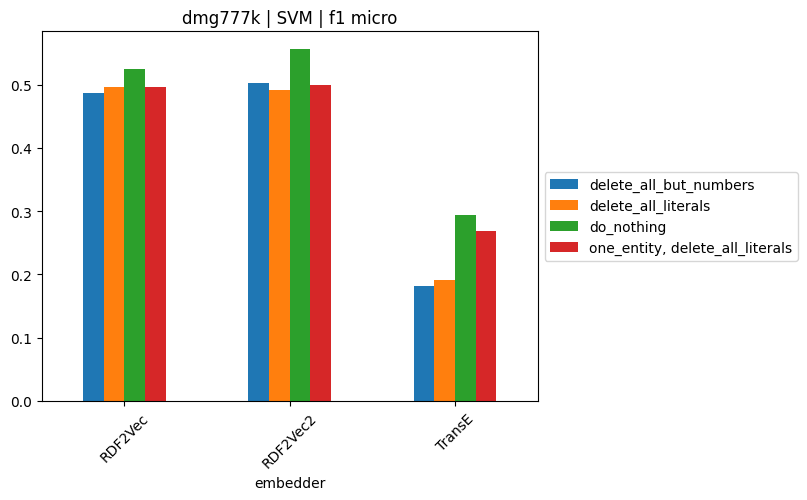

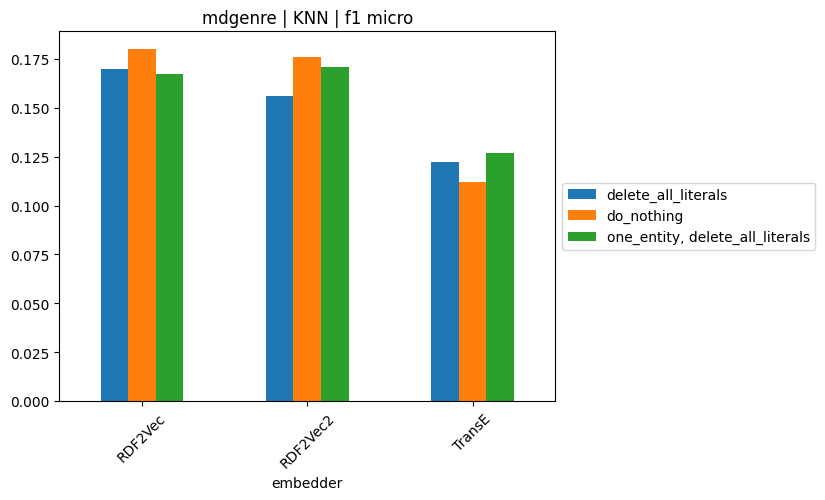

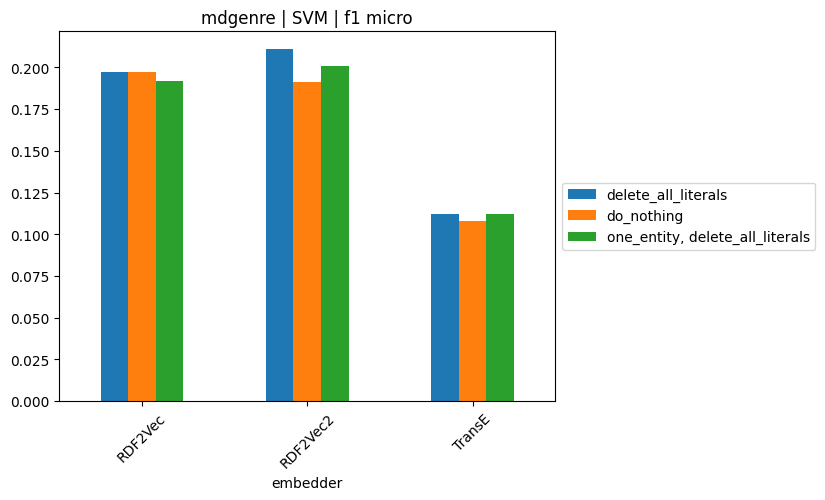

In [16]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(one|delete|do_nothing).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Inspect Binning

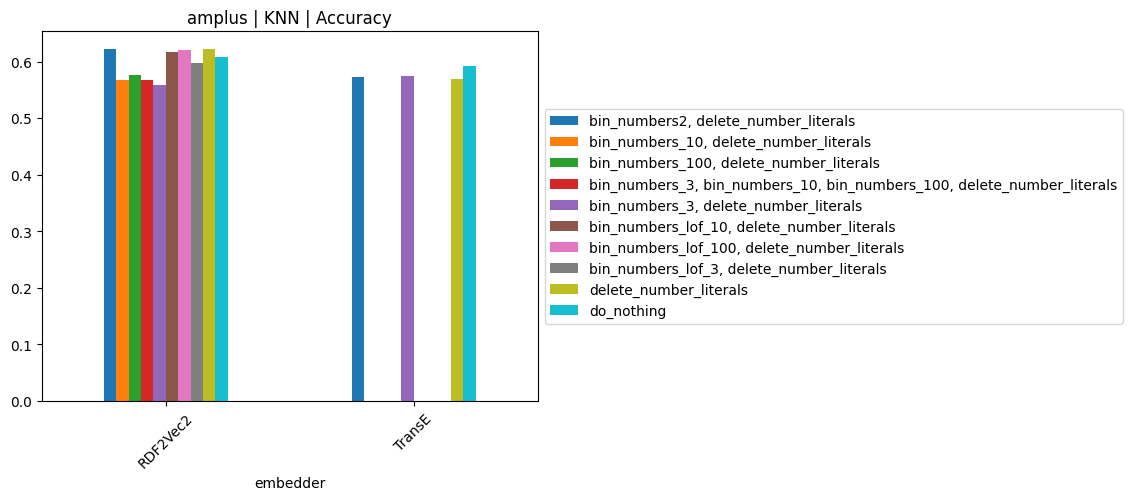

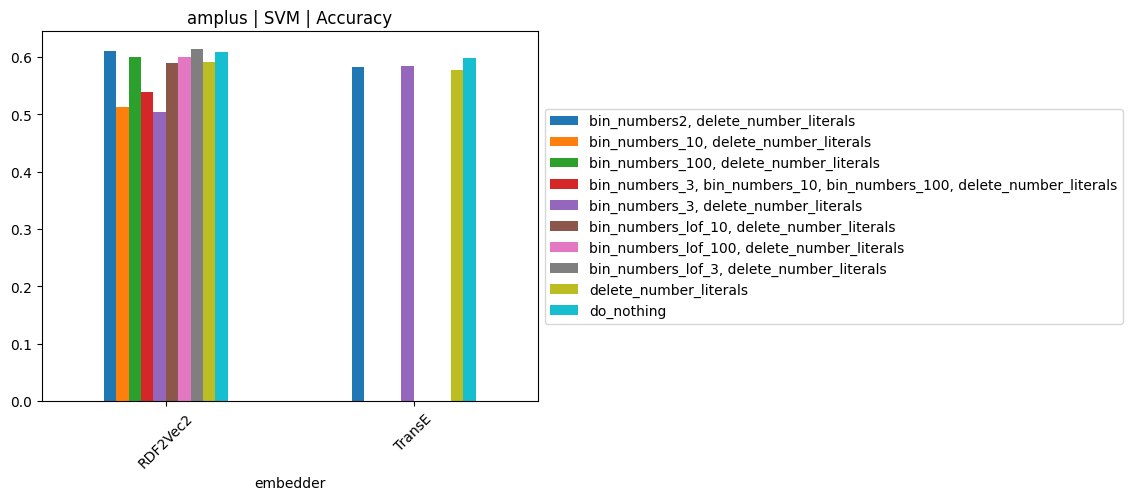

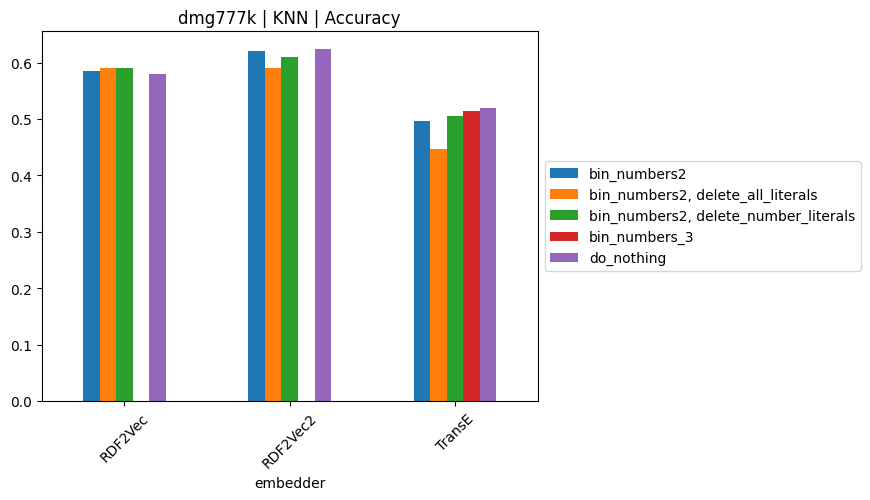

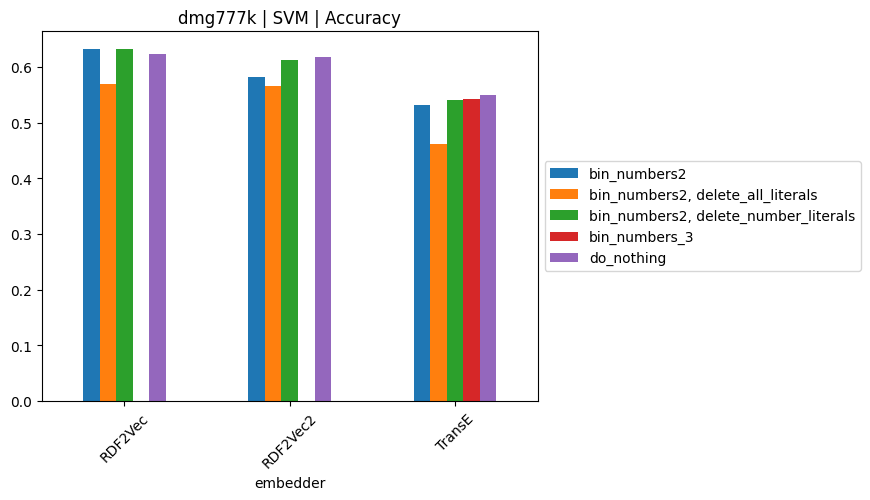

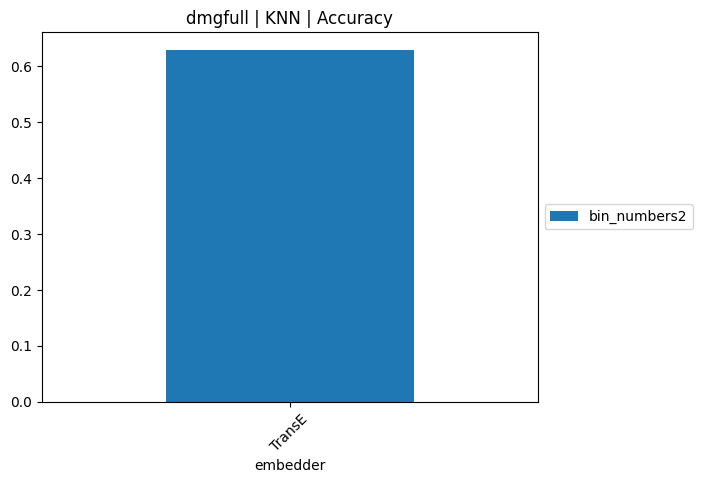

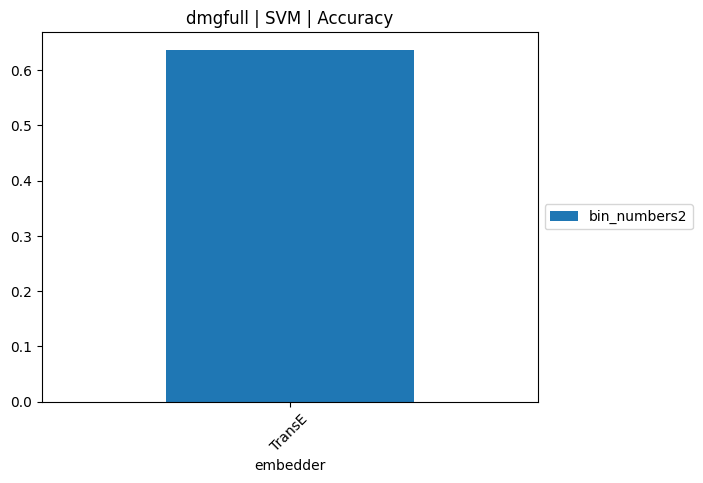

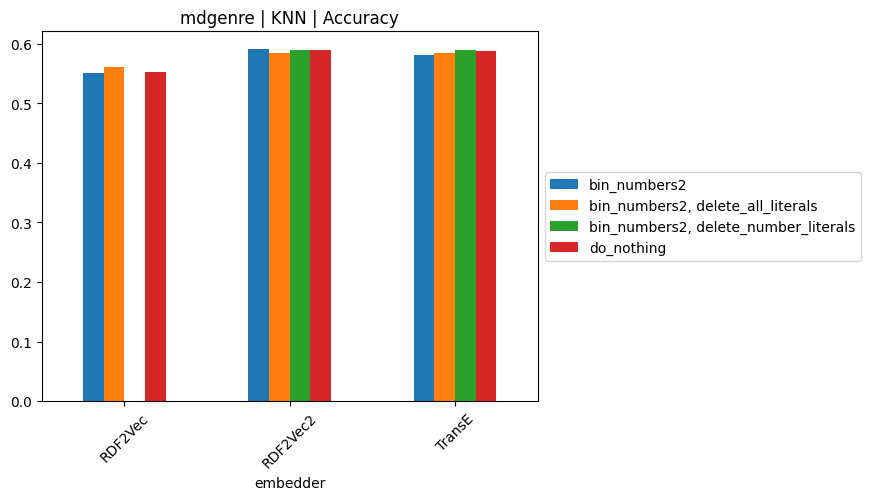

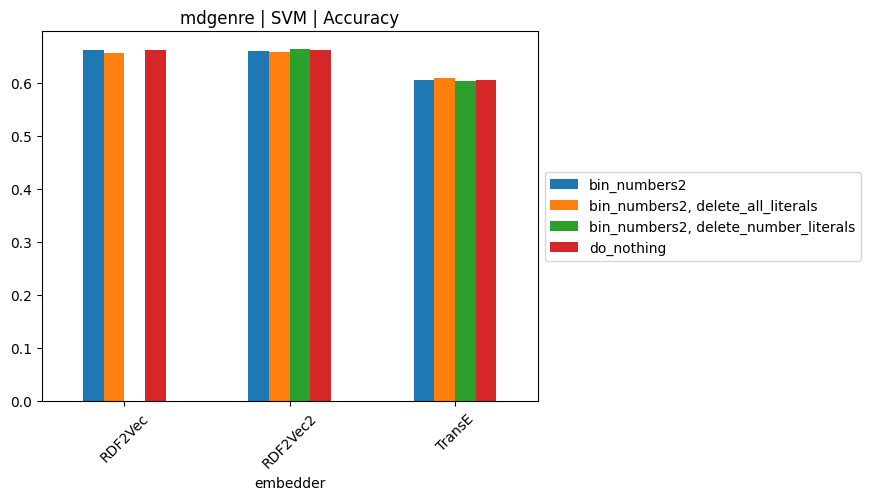

In [20]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|do_nothing).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|do_nothing).*'))],
               index='embedder', columns=['steps'],values='f1_macro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | Accuracy').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

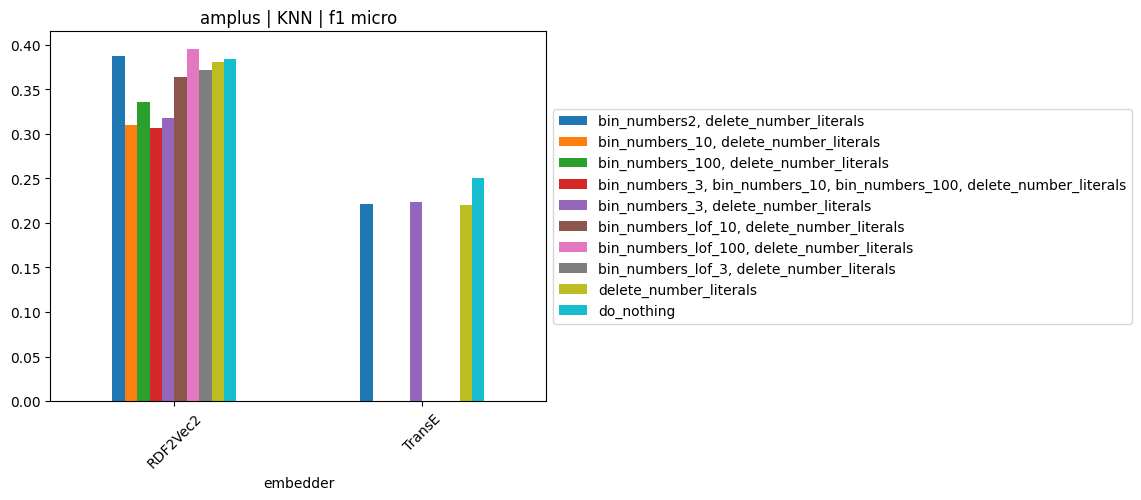

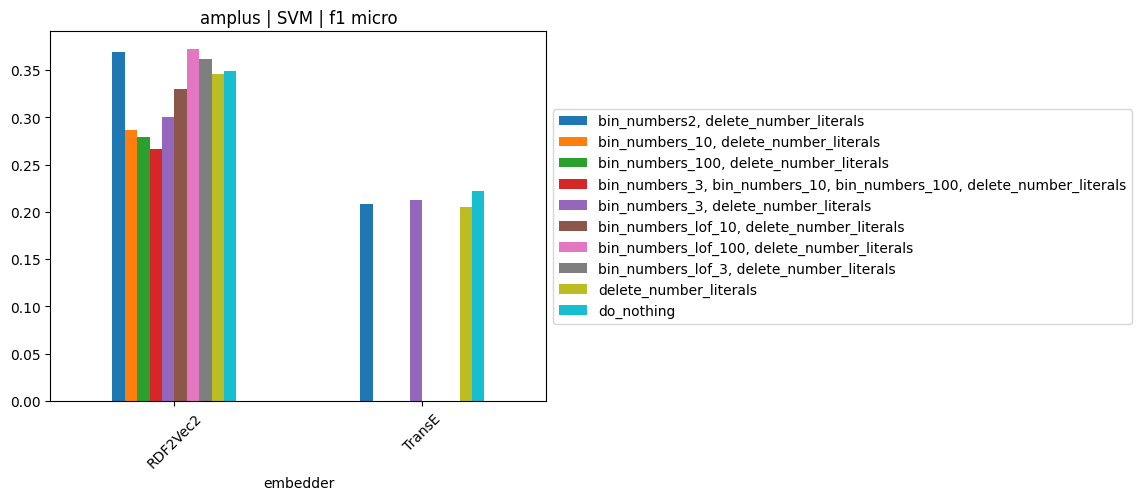

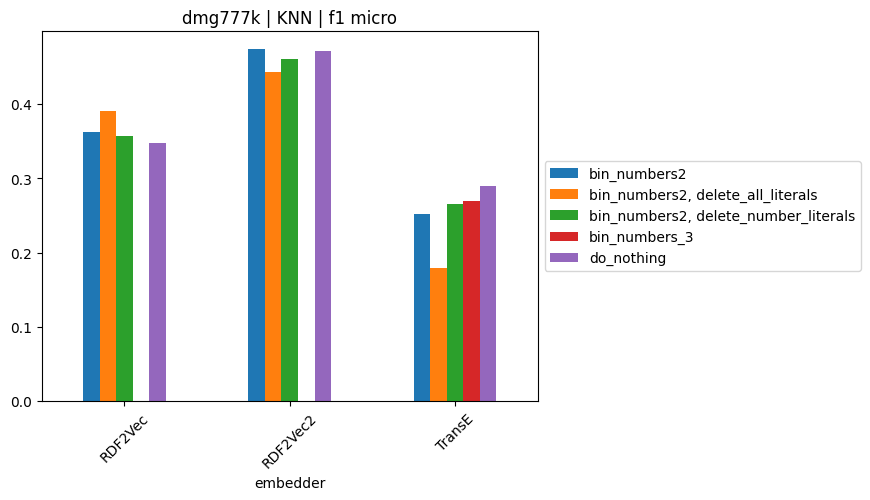

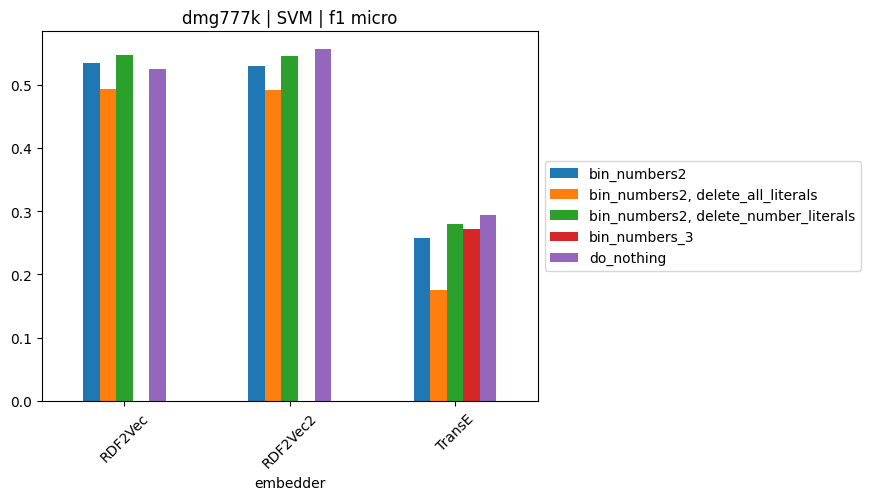

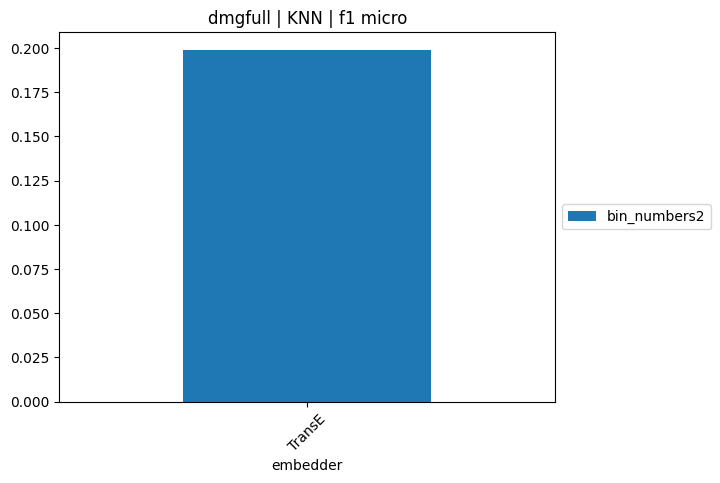

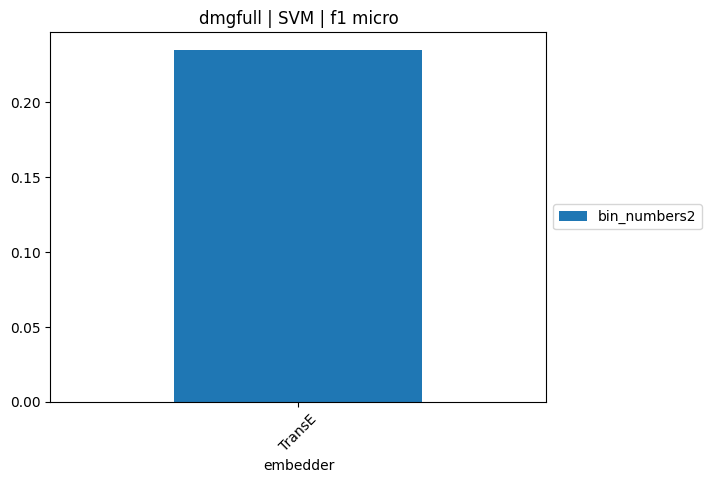

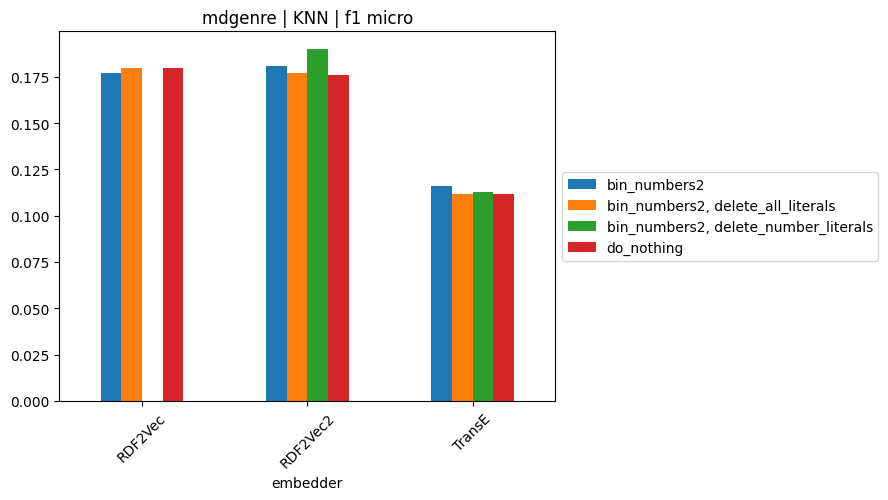

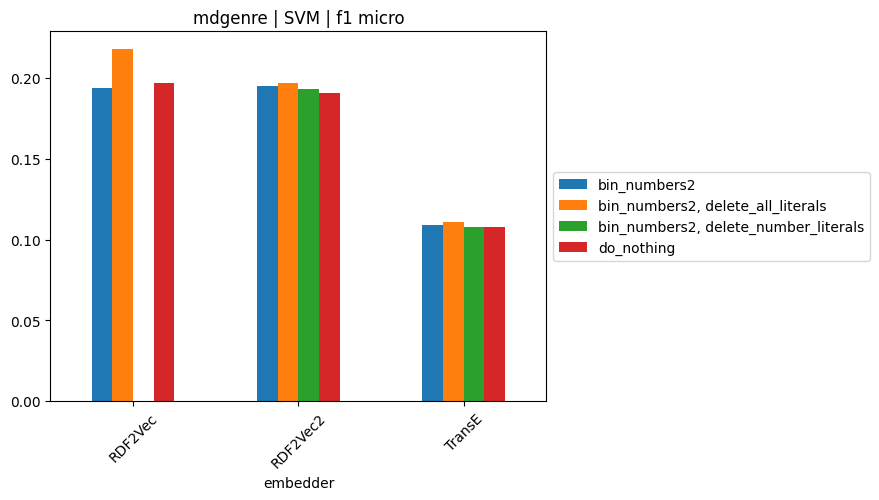

In [18]:
for dataset in df['dataset'].unique():
    for evaluation in df['eval_method'].unique():
        if len(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|do_nothing).*'))]) != 0:
            pd.pivot_table(df[(df['dataset']==dataset) & (df['eval_method'] == evaluation) & (df['steps'].str.match(r'(bin_numbers|delete_number|do_nothing).*'))],
               index='embedder', columns=['steps'],values='f1_micro'
              ).plot(subplots=False, rot= 45, kind='bar', title=f'{dataset} | {evaluation} | f1 micro').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))